In [1]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=ba63b1e41366e762aadf3efcb36ada7ad7896bd5485552641ba9763a610fbbf7
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [2]:
from google.colab import files

uploaded = files.upload()  # This will open a file selection dialog

Saving TimeBasedFeatures-Dataset-120s-NO-VPN.arff to TimeBasedFeatures-Dataset-120s-NO-VPN.arff
Saving TimeBasedFeatures-Dataset-120s-VPN.arff to TimeBasedFeatures-Dataset-120s-VPN.arff


In [3]:
from scipy.io import arff
import pandas as pd

# Load VPN dataset
vpn_data, _ = arff.loadarff("TimeBasedFeatures-Dataset-120s-VPN.arff")
df_vpn = pd.DataFrame(vpn_data)

# Load Non-VPN dataset
non_vpn_data, _ = arff.loadarff("TimeBasedFeatures-Dataset-120s-NO-VPN.arff")
df_non_vpn = pd.DataFrame(non_vpn_data)

# Display first few rows of each dataset
print("VPN Dataset:\n", df_vpn.head())
print("\nNon-VPN Dataset:\n", df_non_vpn.head())


VPN Dataset:
       duration   total_fiat   total_biat  min_fiat  min_biat    max_fiat  \
0  119364082.0  119364082.0  119338343.0       9.0      17.0  58714597.0   
1   93952224.0   93736153.0   93738835.0       6.0       7.0  45211965.0   
2   73934090.0   73802530.0   73804692.0       3.0      14.0  27749148.0   
3   42933658.0   42803851.0   42933658.0       0.0       0.0   5957694.0   
4     270207.0     203681.0     244006.0      15.0      10.0     27147.0   

     max_biat     mean_fiat     mean_biat  flowPktsPerSecond  ...  \
0  58776480.0  32702.488219  20131.299426          80.258649  ...   
1  45220727.0  37645.041365  28319.889728          61.754791  ...   
2  27746116.0  55117.647498  25189.314676          57.767668  ...   
3   5958561.0  31706.556296  16055.967838          93.772583  ...   
4     66572.0    593.822157    363.104167        3763.781101  ...   

     std_flowiat  min_active  mean_active  max_active    std_active  \
0  845678.238767  58776675.0  59700000.00  

In [4]:
from sklearn.preprocessing import LabelEncoder

# Combine both datasets
df_combined = pd.concat([df_vpn, df_non_vpn], ignore_index=True)

# Encode the class1 column
label_encoder = LabelEncoder()
df_combined["label"] = label_encoder.fit_transform(df_combined["class1"])

# Check assigned labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{b'BROWSING': np.int64(0), b'CHAT': np.int64(1), b'FT': np.int64(2), b'MAIL': np.int64(3), b'P2P': np.int64(4), b'STREAMING': np.int64(5), b'VOIP': np.int64(6), b'VPN-BROWSING': np.int64(7), b'VPN-CHAT': np.int64(8), b'VPN-FT': np.int64(9), b'VPN-MAIL': np.int64(10), b'VPN-P2P': np.int64(11), b'VPN-STREAMING': np.int64(12), b'VPN-VOIP': np.int64(13)}


In [5]:
# Drop the original 'class1' column since it's now encoded
X = df_combined.drop(columns=["class1", "label"])  # Features
y = df_combined["label"]  # Target labels


In [6]:
# Print all unique labels
print(df_combined["class1"].unique())


[b'VPN-BROWSING' b'VPN-CHAT' b'VPN-FT' b'VPN-MAIL' b'VPN-P2P'
 b'VPN-STREAMING' b'VPN-VOIP' b'BROWSING' b'CHAT' b'FT' b'MAIL' b'P2P'
 b'STREAMING' b'VOIP']


In [7]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling (exclude 'class1' and 'label')
numeric_cols = df_combined.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
df_combined[numeric_cols] = scaler.fit_transform(df_combined[numeric_cols])

# Print the first few rows to verify
print(df_combined.head())


   duration  total_fiat  total_biat  min_fiat  min_biat  max_fiat  max_biat  \
0  1.429012    1.496831    1.593859 -0.311492 -0.276873  1.425433  1.787109   
1  0.943386    0.997376    1.074598 -0.311492 -0.276873  0.967775  1.234405   
2  0.560835    0.608896    0.670254 -0.311492 -0.276873  0.375891  0.521920   
3 -0.031590    0.004772    0.044066 -0.311492 -0.276874 -0.362707 -0.366416   
4 -0.846899   -0.825449   -0.821851 -0.311491 -0.276873 -0.563717 -0.606648   

   mean_fiat  mean_biat  flowPktsPerSecond  ...  min_active  mean_active  \
0  -0.442142  -0.433269          -0.209758  ...    1.584512     1.496187   
1  -0.441801  -0.432656          -0.210177  ...    1.120622     1.065511   
2  -0.440594  -0.432890          -0.210268  ...   -0.374308    -0.204391   
3  -0.442211  -0.433574          -0.209451  ...   -0.369800    -0.335354   
4  -0.444361  -0.434750          -0.126184  ...   -0.425549    -0.512511   

   max_active  std_active  min_idle  mean_idle  max_idle  std_idle  

In [8]:
df_combined["label"] = df_combined["label"].astype(int)  # Convert labels to integers
print(df_combined.head())  # Check if labels are correct now


   duration  total_fiat  total_biat  min_fiat  min_biat  max_fiat  max_biat  \
0  1.429012    1.496831    1.593859 -0.311492 -0.276873  1.425433  1.787109   
1  0.943386    0.997376    1.074598 -0.311492 -0.276873  0.967775  1.234405   
2  0.560835    0.608896    0.670254 -0.311492 -0.276873  0.375891  0.521920   
3 -0.031590    0.004772    0.044066 -0.311492 -0.276874 -0.362707 -0.366416   
4 -0.846899   -0.825449   -0.821851 -0.311491 -0.276873 -0.563717 -0.606648   

   mean_fiat  mean_biat  flowPktsPerSecond  ...  min_active  mean_active  \
0  -0.442142  -0.433269          -0.209758  ...    1.584512     1.496187   
1  -0.441801  -0.432656          -0.210177  ...    1.120622     1.065511   
2  -0.440594  -0.432890          -0.210268  ...   -0.374308    -0.204391   
3  -0.442211  -0.433574          -0.209451  ...   -0.369800    -0.335354   
4  -0.444361  -0.434750          -0.126184  ...   -0.425549    -0.512511   

   max_active  std_active  min_idle  mean_idle  max_idle  std_idle  

In [9]:
from sklearn.preprocessing import LabelEncoder

# Ensure 'class1' is decoded properly (convert byte strings to normal strings)
df_combined['class1'] = df_combined['class1'].str.decode("utf-8")

# Reapply label encoding
label_encoder = LabelEncoder()
df_combined["label"] = label_encoder.fit_transform(df_combined["class1"])

# Check unique labels again
print(df_combined["label"].unique())

# Print the label mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


[ 7  8  9 10 11 12 13  0  1  2  3  4  5  6]
{'BROWSING': np.int64(0), 'CHAT': np.int64(1), 'FT': np.int64(2), 'MAIL': np.int64(3), 'P2P': np.int64(4), 'STREAMING': np.int64(5), 'VOIP': np.int64(6), 'VPN-BROWSING': np.int64(7), 'VPN-CHAT': np.int64(8), 'VPN-FT': np.int64(9), 'VPN-MAIL': np.int64(10), 'VPN-P2P': np.int64(11), 'VPN-STREAMING': np.int64(12), 'VPN-VOIP': np.int64(13)}


In [10]:
print(df_combined.isnull().sum())


duration              0
total_fiat            0
total_biat            0
min_fiat              0
min_biat              0
max_fiat              0
max_biat              0
mean_fiat             0
mean_biat             0
flowPktsPerSecond     0
flowBytesPerSecond    0
min_flowiat           0
max_flowiat           0
mean_flowiat          0
std_flowiat           0
min_active            0
mean_active           0
max_active            0
std_active            0
min_idle              0
mean_idle             0
max_idle              0
std_idle              0
class1                0
label                 0
dtype: int64


In [11]:
print("Duplicate rows:", df_combined.duplicated().sum())


Duplicate rows: 1193


In [12]:
df_combined = df_combined.drop_duplicates().reset_index(drop=True)
print("Duplicate rows after removal:", df_combined.duplicated().sum())


Duplicate rows after removal: 0


In [13]:
print("Total rows after removing duplicates:", df_combined.shape[0])


Total rows after removing duplicates: 9589


In [14]:
from imblearn.over_sampling import SMOTE

# Define features (X) and labels (y)
X = df_combined.drop(columns=["label", "class1"])  # Drop non-numeric columns
y = df_combined["label"]  # Target variable

# Apply SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["label"] = y_resampled  # Add back the label column

# Verify new class distribution
print("After SMOTE:\n", df_resampled["label"].value_counts())


After SMOTE:
 label
7     2500
8     2500
9     2500
10    2500
11    2500
12    2500
13    2500
0     2500
1     2500
2     2500
3     2500
4     2500
5     2500
6     2500
Name: count, dtype: int64


In [15]:
unique_counts = df_combined.nunique()
constant_columns = unique_counts[unique_counts == 1].index
df_combined.drop(columns=constant_columns, inplace=True)


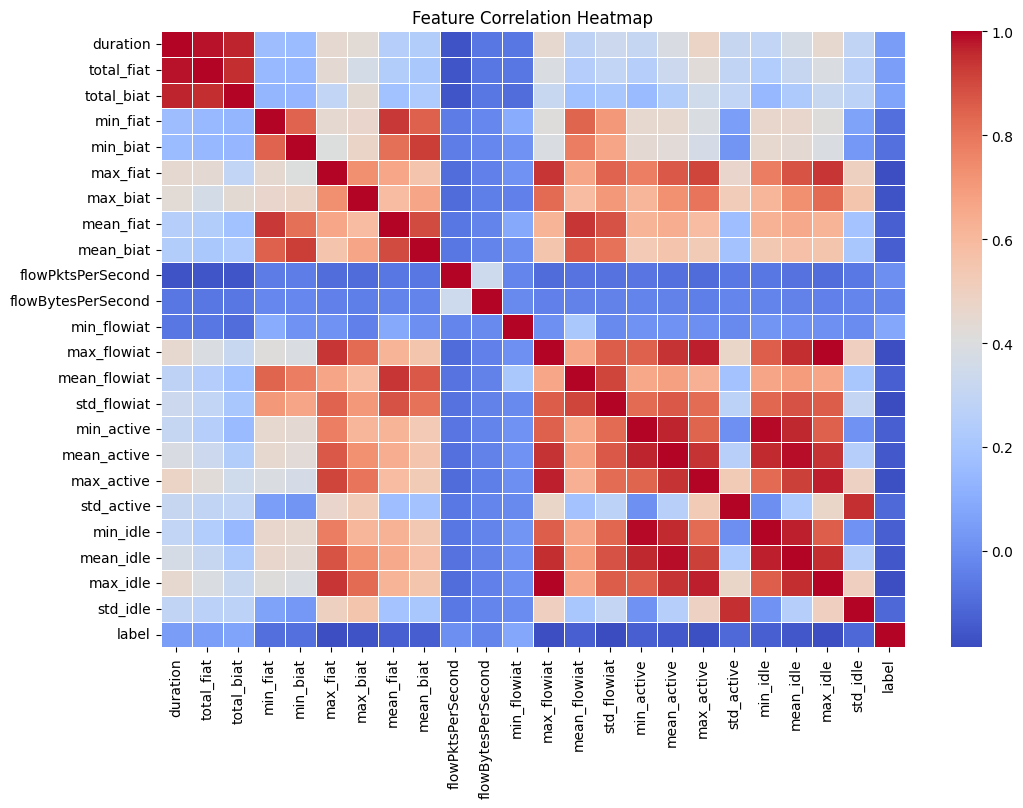

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_resampled.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
import pandas as pd

# Compute correlation matrix
correlation_matrix = df_resampled.corr()

# Print correlation values of all features with respect to the 'label'
print(correlation_matrix["label"].sort_values(ascending=False))


label                 1.000000
min_flowiat           0.081817
total_biat            0.071460
total_fiat            0.052505
duration              0.048000
flowPktsPerSecond     0.000870
flowBytesPerSecond   -0.031771
min_biat             -0.088179
min_fiat             -0.091391
std_active           -0.104008
std_idle             -0.110637
min_active           -0.130884
mean_flowiat         -0.132419
min_idle             -0.133297
mean_fiat            -0.134371
mean_biat            -0.135538
mean_active          -0.152655
mean_idle            -0.155934
max_biat             -0.164751
max_active           -0.172639
max_flowiat          -0.177643
max_idle             -0.179173
max_fiat             -0.180077
std_flowiat          -0.185588
Name: label, dtype: float64


In [18]:
# Creating new ratio features
df_combined["biat_fiat_ratio"] = df_combined["total_biat"] / (df_combined["total_fiat"] + 1e-5)
df_combined["flowiat_active_ratio"] = df_combined["mean_flowiat"] / (df_combined["mean_active"] + 1e-5)

# Creating difference features
df_combined["fiat_diff"] = df_combined["max_fiat"] - df_combined["min_fiat"]
df_combined["biat_diff"] = df_combined["max_biat"] - df_combined["min_biat"]

# Creating multiplication features
df_combined["flow_rate"] = df_combined["flowPktsPerSecond"] * df_combined["flowBytesPerSecond"]
df_combined["active_idle_product"] = df_combined["mean_active"] * df_combined["mean_idle"]

# Display the first few rows to check
df_combined.head()


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,max_idle,std_idle,class1,label,biat_fiat_ratio,flowiat_active_ratio,fiat_diff,biat_diff,flow_rate,active_idle_product
0,1.429012,1.496831,1.593859,-0.311492,-0.276873,1.425433,1.787109,-0.442142,-0.433269,-0.209758,...,1.290931,-0.326569,VPN-BROWSING,7,1.064815,-0.326483,1.736925,2.063981,0.016453,2.207830
1,0.943386,0.997376,1.074598,-0.311492,-0.276873,0.967775,1.234405,-0.441801,-0.432656,-0.210177,...,0.857320,-0.357318,VPN-BROWSING,7,1.077414,-0.457841,1.279267,1.511279,0.016850,1.086123
2,0.560835,0.608896,0.670254,-0.311492,-0.276873,0.375891,0.521920,-0.440594,-0.432890,-0.210268,...,0.307270,0.853991,VPN-BROWSING,7,1.100751,2.385973,0.687383,0.798792,0.016810,0.051749
3,-0.031590,0.004772,0.044066,-0.311492,-0.276874,-0.362707,-0.366416,-0.442211,-0.433574,-0.209451,...,-0.381935,-0.192123,VPN-BROWSING,7,9.214135,1.457581,-0.051215,-0.089542,0.016206,0.130433
4,-0.846899,-0.825449,-0.821851,-0.311491,-0.276873,-0.563717,-0.606648,-0.444361,-0.434750,-0.126184,...,-0.566296,-0.358060,VPN-BROWSING,7,0.995654,0.957232,-0.252226,-0.329775,-0.025745,0.257093


In [19]:
# Drop non-numeric columns before computing correlation
df_numeric = df_combined.select_dtypes(include=['number'])

# Compute correlation with label and sort
correlation_with_label = df_numeric.corr()["label"].sort_values(ascending=False)
print(correlation_with_label)


label                   1.000000
min_flowiat             0.098530
flowPktsPerSecond       0.061056
biat_fiat_ratio         0.012746
min_biat                0.011872
total_biat              0.007920
flow_rate               0.007776
flowBytesPerSecond     -0.000884
flowiat_active_ratio   -0.001598
min_fiat               -0.008288
total_fiat             -0.032602
duration               -0.048441
mean_biat              -0.055884
active_idle_product    -0.064634
mean_fiat              -0.078966
mean_flowiat           -0.082947
std_active             -0.117158
std_idle               -0.128086
biat_diff              -0.161461
max_biat               -0.168036
min_active             -0.173004
min_idle               -0.174506
fiat_diff              -0.175585
std_flowiat            -0.179454
mean_active            -0.201024
mean_idle              -0.204483
max_fiat               -0.212463
max_active             -0.214831
max_flowiat            -0.221654
max_idle               -0.222735
Name: labe

In [20]:
# Check skewness of numeric features
df_numeric.skew().sort_values(ascending=False)


,0
flow_rate,60.467189
flowBytesPerSecond,41.794546
flowPktsPerSecond,26.639195
active_idle_product,25.455105
min_flowiat,15.750376
min_idle,6.831587
min_active,6.771929
mean_idle,6.382740
mean_active,6.321750
max_flowiat,5.358107


In [21]:
import numpy as np

# Apply log transformation to highly skewed features
skewed_features = ["flow_rate", "flowBytesPerSecond", "flowPktsPerSecond",
                   "active_idle_product", "min_flowiat", "min_idle", "min_active",
                   "mean_idle", "mean_active", "max_flowiat", "max_idle",
                   "std_idle", "max_active", "std_active", "max_fiat", "max_biat",
                   "std_flowiat", "min_biat", "min_fiat", "mean_biat", "mean_flowiat",
                   "mean_fiat", "fiat_diff", "biat_diff"]

df_combined[skewed_features] = df_combined[skewed_features].apply(lambda x: np.log1p(x))

# Verify skewness again
print(df_combined[skewed_features].skew().sort_values(ascending=False))


flow_rate              13.793624
flowBytesPerSecond     10.795156
min_flowiat             8.809345
flowPktsPerSecond       5.450614
active_idle_product     4.084331
min_biat                3.048882
min_fiat                2.642953
std_idle                2.078232
std_active              1.994413
mean_biat               1.723499
mean_fiat               1.696588
min_idle                1.607573
min_active              1.580136
mean_flowiat            1.405836
mean_idle               1.075399
std_flowiat             1.073912
mean_active             1.022029
max_fiat                0.804135
max_flowiat             0.771313
max_idle                0.764439
max_biat                0.712435
max_active              0.692110
biat_diff               0.215111
fiat_diff              -0.336461
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
from sklearn.preprocessing import PowerTransformer

# Select features with high skewness (skew > 1 or skew < -1)
high_skew_features = ["flow_rate", "flowBytesPerSecond", "min_flowiat",
                      "flowPktsPerSecond", "active_idle_product", "min_biat",
                      "min_fiat", "std_idle", "std_active", "mean_biat",
                      "mean_fiat", "min_idle", "min_active", "mean_flowiat",
                      "mean_idle", "std_flowiat", "mean_active"]

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method="yeo-johnson")
df_combined[high_skew_features] = pt.fit_transform(df_combined[high_skew_features])

# Check skewness again
print(df_combined[high_skew_features].skew().sort_values(ascending=False))


flowPktsPerSecond      2.335427
min_biat               2.115717
flowBytesPerSecond     2.104541
min_flowiat            1.840534
min_fiat               1.832050
std_idle               1.138361
std_active             1.102504
mean_biat              0.734648
mean_fiat              0.684665
min_idle               0.628002
min_active             0.591543
mean_flowiat           0.559939
std_flowiat            0.463160
mean_idle              0.403694
mean_active            0.367115
active_idle_product   -3.871472
flow_rate             -6.432930
dtype: float64


In [23]:
correlation_with_label = df_combined.drop(columns=["class1"]).corr()["label"].sort_values(ascending=False)
print(correlation_with_label)


label                   1.000000
min_flowiat             0.227800
min_fiat                0.102059
min_biat                0.100193
flow_rate               0.094820
flowBytesPerSecond      0.047894
flowPktsPerSecond       0.042041
biat_fiat_ratio         0.012746
total_biat              0.007920
flowiat_active_ratio   -0.001598
total_fiat             -0.032602
duration               -0.048441
active_idle_product    -0.120775
std_active             -0.123209
std_idle               -0.128801
mean_fiat              -0.129379
mean_biat              -0.144930
mean_flowiat           -0.151375
max_biat               -0.201150
min_active             -0.206585
min_idle               -0.211873
max_fiat               -0.218051
biat_diff              -0.233998
std_flowiat            -0.238269
mean_active            -0.241415
max_active             -0.246633
mean_idle              -0.250080
max_flowiat            -0.254498
max_idle               -0.257452
fiat_diff              -0.266562
Name: labe

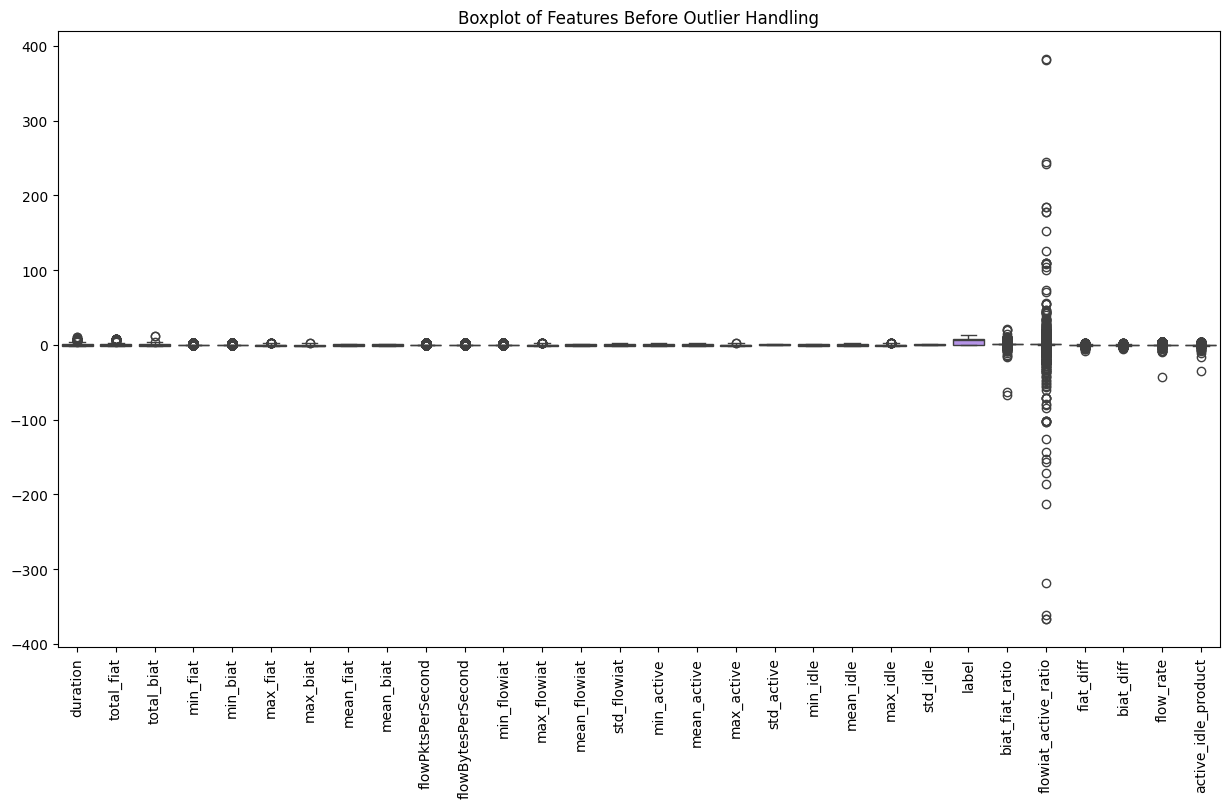

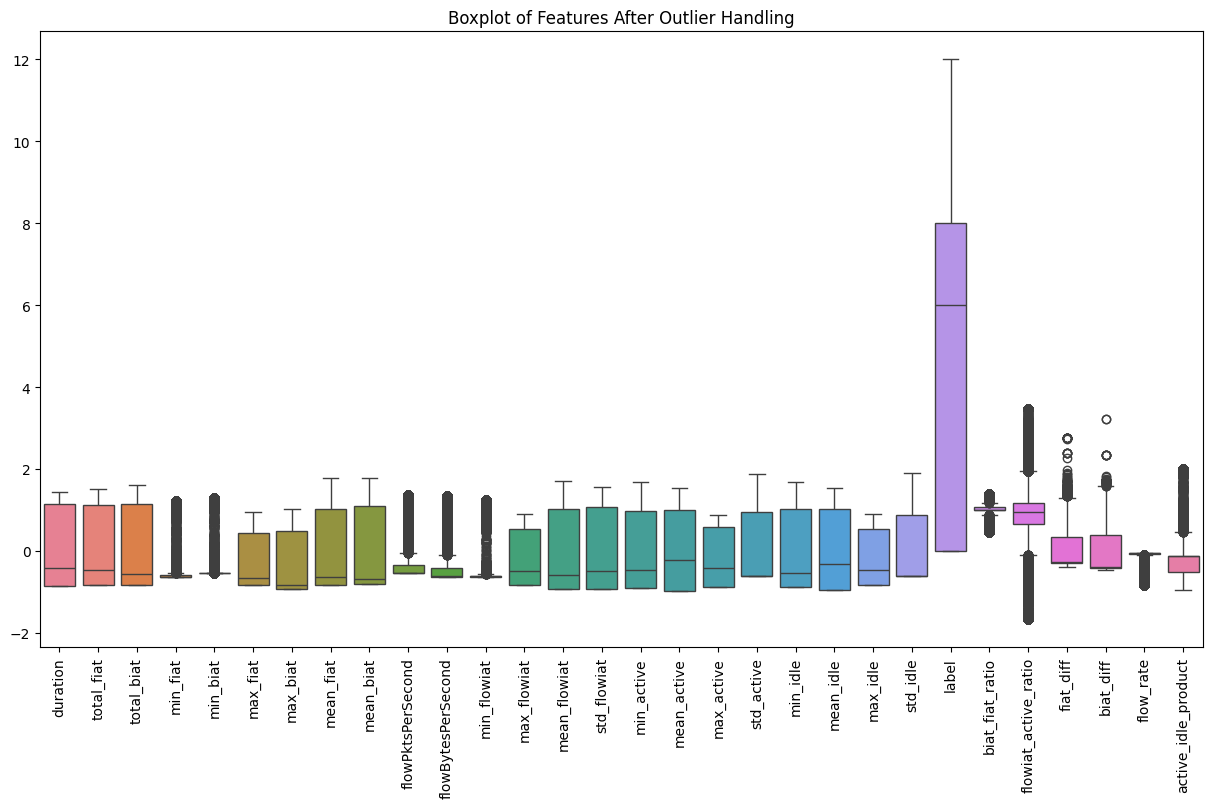

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Step 1: Visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_combined)
plt.xticks(rotation=90)
plt.title("Boxplot of Features Before Outlier Handling")
plt.show()

# Step 2: Detect & Handle Outliers Using IQR
def handle_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Winsorize extreme outliers (capping them at 5th & 95th percentile)
        df[col] = winsorize(df[col], limits=[0.05, 0.05])

        # If feature is still highly skewed, apply log transformation
        if df[col].skew() > 1.5:
            df[col] = np.log1p(df[col])

    return df

df_combined = handle_outliers(df_combined)

# Step 3: Re-visualize after handling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_combined)
plt.xticks(rotation=90)
plt.title("Boxplot of Features After Outlier Handling")
plt.show()


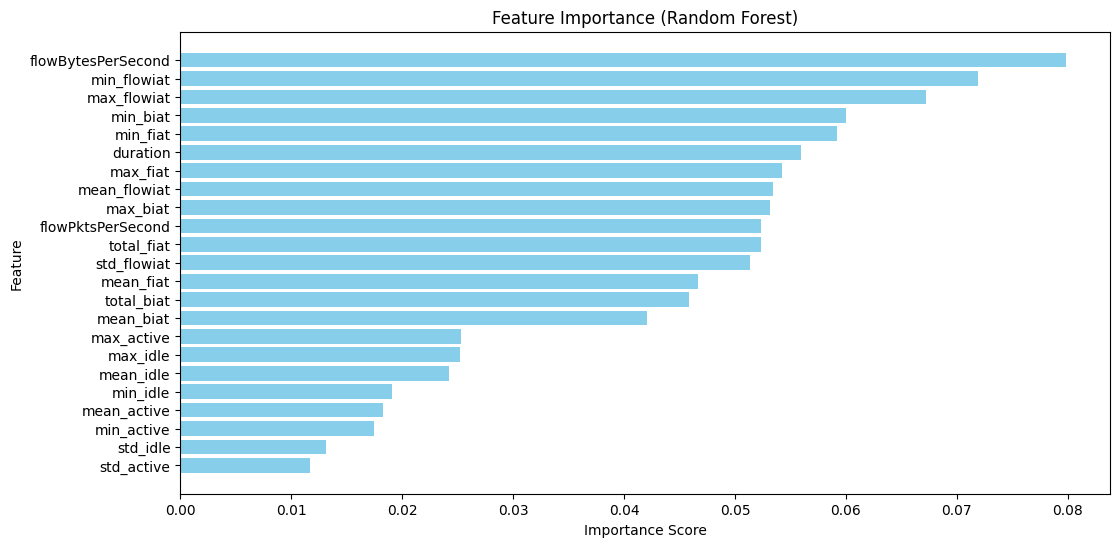

Selected Features:
['flowBytesPerSecond' 'min_flowiat' 'max_flowiat' 'min_biat' 'min_fiat'
 'duration' 'max_fiat' 'mean_flowiat' 'max_biat' 'flowPktsPerSecond'
 'total_fiat' 'std_flowiat' 'mean_fiat' 'total_biat' 'mean_biat'
 'max_active' 'max_idle']


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance (Descending Order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# Set a dynamic threshold (keeping top X% features)
cumulative_importance = importance_df['Importance'].cumsum()
threshold = 0.90  # Keep features that contribute to 90% of total importance
selected_features = importance_df[cumulative_importance <= (cumulative_importance.max() * threshold)]['Feature'].values

# Update dataset with selected features
X_selected = X[selected_features]

# Display selected features
print("Selected Features:")
print(selected_features)



In [26]:
from sklearn.model_selection import train_test_split

# Assuming X_selected contains selected features and y contains labels
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7671, 17)
Testing data shape: (1918, 17)


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8160
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       500
           1       0.69      0.56      0.62        48
           2       0.81      0.73      0.77        93
           3       0.81      0.71      0.76        35
           4       0.87      0.94      0.90       200
           5       0.58      0.54      0.56        35
           6       0.96      0.95      0.95        78
           7       0.82      0.80      0.81       449
           8       0.69      0.47      0.56        62
           9       0.70      0.62      0.66       134
          10       0.63      0.78      0.70        60
          11       0.81      0.73      0.77       119
          12       0.80      0.83      0.81        29
          13       0.94      0.97      0.95        76

    accuracy                           0.82      1918
   macro avg       0.78      0.75      0.76      1918
weighted avg       0.81      0.82      

In [60]:
# Cell 1: Import comparison models
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# Cell 2: Initialize models with optimal params
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        tree_method='hist'
    ),
    "KNN (Windowed)": KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    ),
    "Online SGD": SGDClassifier(
        loss='log_loss',
        penalty='l2',
        learning_rate='adaptive'
    )
}

In [29]:
!pip install river


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [30]:
import river
print(river.__version__)


0.22.0


In [31]:
import river.drift

# List all available attributes and functions in river.drift
print(dir(river.drift))


['ADWIN', 'DriftRetrainingClassifier', 'DummyDriftDetector', 'KSWIN', 'NoDrift', 'PageHinkley', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'adwin', 'adwin_c', 'annotations', 'binary', 'datasets', 'dummy', 'kswin', 'no_drift', 'page_hinkley', 'retrain']


In [32]:
from river.drift import ADWIN

# Initialize ADWIN drift detector
adwin = ADWIN()

# Check if it's properly initialized
print(adwin)


ADWIN


In [33]:
import numpy as np
from river.drift import ADWIN

# Initialize ADWIN with a more relaxed delta value
adwin = ADWIN(delta=0.001)

# Simulated data stream with concept drift
data_stream = np.concatenate([np.random.normal(0.5, 0.05, 500), np.random.normal(0.8, 0.05, 500)])

# Apply ADWIN
for i, value in enumerate(data_stream):
    adwin.update(value)  # Feed data to ADWIN

    # Print ADWIN statistics every 50 steps
    if i % 50 == 0:
        print(f"Index {i}: Width={adwin.width}, Estimation={adwin.estimation}")

    # Adjusted drift detection conditions: increase width threshold and estimation difference
    if adwin.width > 200 and abs(adwin.estimation - 0.5) > 0.2:
        print(f"Change detected at index {i} with value {value}")

        # Reinitialize ADWIN after detecting drift
        adwin = ADWIN(delta=0.001)  # Try increasing delta to 0.01 or higher  # Reset by reinitializing


Index 0: Width=1.0, Estimation=0.49363171171074066
Index 50: Width=51.0, Estimation=0.4986544820255192
Index 100: Width=101.0, Estimation=0.49496479387547954
Index 150: Width=151.0, Estimation=0.4953124333135926
Index 200: Width=201.0, Estimation=0.49485997569614687
Index 250: Width=251.0, Estimation=0.4951296634378111
Index 300: Width=301.0, Estimation=0.49597150713728677
Index 350: Width=351.0, Estimation=0.49675353422969426
Index 400: Width=401.0, Estimation=0.4964539135399653
Index 450: Width=451.0, Estimation=0.4983072367026548
Index 500: Width=501.0, Estimation=0.4993413812801893
Index 550: Width=7.0, Estimation=0.836743991131729
Index 600: Width=57.0, Estimation=0.795456181310535
Index 650: Width=107.0, Estimation=0.7948424411473565
Index 700: Width=157.0, Estimation=0.797188822579865
Change detected at index 744 with value 0.7185376484040769
Index 750: Width=6.0, Estimation=0.8277375742564055
Index 800: Width=56.0, Estimation=0.8006292874591134
Index 850: Width=106.0, Estimatio

In [34]:
print(df_combined.columns)


Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1', 'label',
       'biat_fiat_ratio', 'flowiat_active_ratio', 'fiat_diff', 'biat_diff',
       'flow_rate', 'active_idle_product'],
      dtype='object')


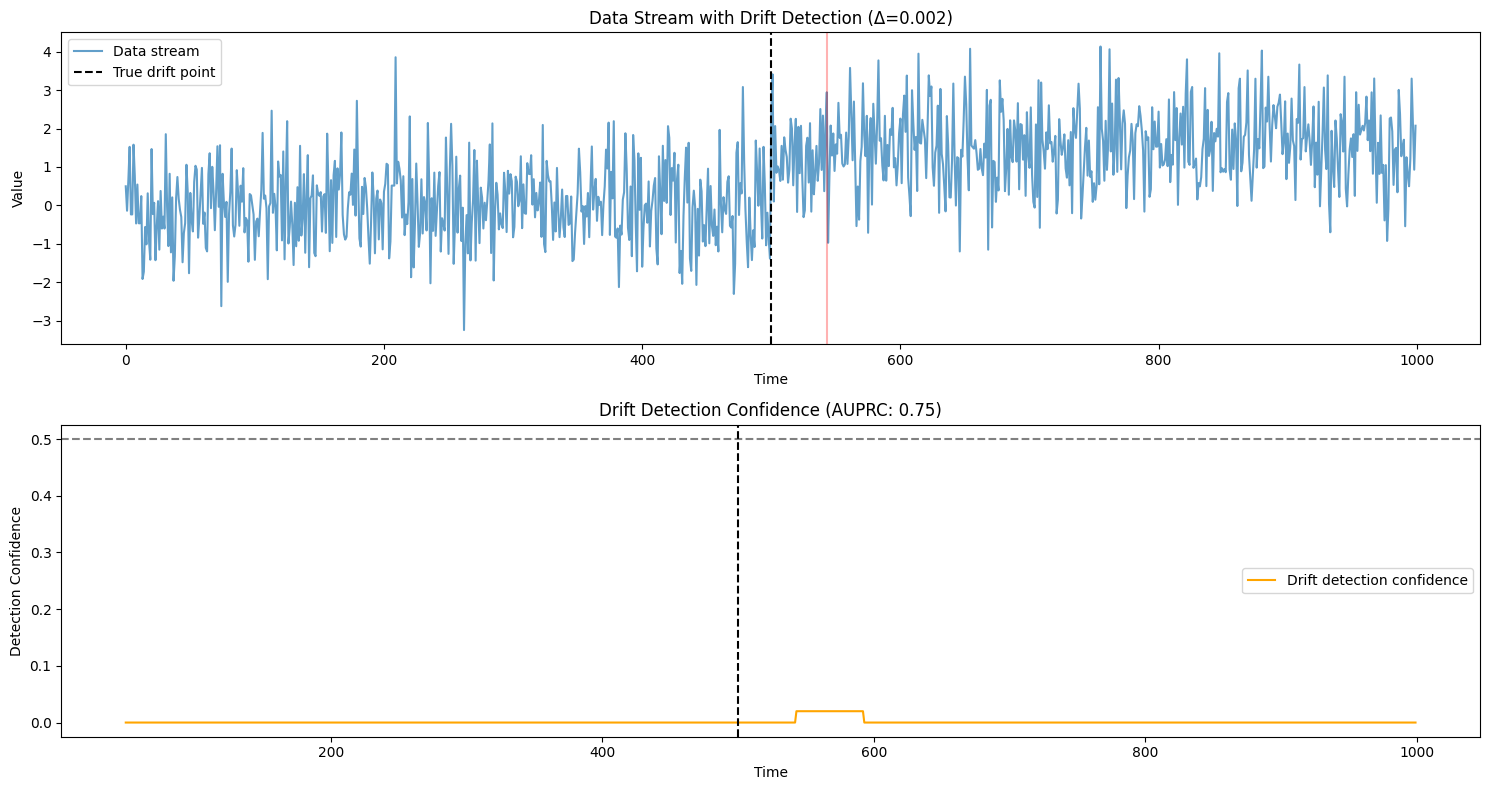

Total drifts detected: 1
First drift detected at: 543
AUPRC: 0.7505


In [35]:
import numpy as np
import pandas as pd
from river.drift import ADWIN
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Configuration
DRIFT_POINT = 500  # Known point where we introduced drift
DELTA = 0.002      # ADWIN sensitivity parameter (smaller = more sensitive)
PLOT_WINDOW = 50   # Window for plotting drift detection confidence

# Generate synthetic data or use your real data
np.random.seed(42)
normal_data = np.random.normal(0, 1, 500)
drifted_data = np.random.normal(1.5, 1, 500)  # Mean shifted by 1.5
combined_data = np.concatenate([normal_data, drifted_data])

# Initialize ADWIN
adwin = ADWIN(delta=DELTA)

# Store results
drift_indices = []
detection_history = []
true_drift = np.zeros(len(combined_data))
true_drift[DRIFT_POINT:] = 1

# Process data
for i, value in enumerate(combined_data):
    adwin.update(value)

    # Standard ADWIN drift detection
    if adwin.drift_detected:
        drift_indices.append(i)
        detection_history.extend([0]*(i - len(detection_history)) + [1])
    else:
        detection_history.append(0)

# Calculate performance metrics
precision, recall, _ = precision_recall_curve(true_drift, detection_history)
auprc = auc(recall, precision)

# Plot results
plt.figure(figsize=(15, 8))

# Plot data stream
plt.subplot(2, 1, 1)
plt.plot(combined_data, label='Data stream', alpha=0.7)
plt.axvline(DRIFT_POINT, color='black', linestyle='--', label='True drift point')
for drift in drift_indices:
    plt.axvline(drift, color='red', alpha=0.3)
plt.title(f'Data Stream with Drift Detection (Δ={DELTA})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot detection metrics
plt.subplot(2, 1, 2)
window_detections = pd.Series(detection_history).rolling(PLOT_WINDOW).mean()
plt.plot(window_detections, label='Drift detection confidence', color='orange')
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(DRIFT_POINT, color='black', linestyle='--')
plt.title(f'Drift Detection Confidence (AUPRC: {auprc:.2f})')
plt.xlabel('Time')
plt.ylabel('Detection Confidence')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Total drifts detected: {len(drift_indices)}")
print(f"First drift detected at: {min(drift_indices) if drift_indices else 'None'}")
print(f"AUPRC: {auprc:.4f}")

In [36]:
# Key features for drift detection
drift_features = [
    'flowPktsPerSecond',
    'flowBytesPerSecond',
    'mean_flowiat',
    'duration',
    'active_idle_product'
]

# Inject drift into each feature (different types of drift)
np.random.seed(42)
for i, feature in enumerate(drift_features):
    split_point = len(df_combined) // 2

    # Apply different drift types to different features
    if i % 3 == 0:  # Sudden mean shift
        df_combined[f'drift_{feature}'] = df_combined[feature].copy()
        df_combined.loc[split_point:, f'drift_{feature}'] += 2 * df_combined[feature].std()

    elif i % 3 == 1:  # Gradual variance increase
        df_combined[f'drift_{feature}'] = df_combined[feature].copy()
        noise = np.linspace(0, 3, len(df_combined)-split_point) * np.random.normal(0, 1, len(df_combined)-split_point)
        df_combined.loc[split_point:, f'drift_{feature}'] += noise

    else:  # Point anomaly injection
        df_combined[f'drift_{feature}'] = df_combined[feature].copy()
        anomaly_indices = np.random.choice(range(split_point, len(df_combined)), size=50, replace=False)
        df_combined.loc[anomaly_indices, f'drift_{feature}'] *= 5

In [37]:
from river.drift import ADWIN, KSWIN, PageHinkley  # Make sure all detectors are imported

detectors = {
    'ADWIN': ADWIN(delta=0.001),          # For gradual drift
    'KSWIN': KSWIN(alpha=0.005, window_size=100),  # For distribution changes
    'PageHinkley': PageHinkley(threshold=15, min_instances=30)  # For sudden shifts
}

# Verify all detectors are properly initialized
print("Detectors initialized:")
for name, detector in detectors.items():
    print(f"- {name}: {detector.__class__.__name__}")

Detectors initialized:
- ADWIN: ADWIN
- KSWIN: KSWIN
- PageHinkley: PageHinkley


In [38]:
from copy import deepcopy

# Store results
results = {feature: {detector: [] for detector in detectors.keys()} for feature in drift_features}

for feature in drift_features:
    data_stream = df_combined[f'drift_{feature}'].values

    for detector_name in detectors.keys():
        # Create a fresh detector instance instead of resetting
        detector = deepcopy(detectors[detector_name])
        drift_indices = []

        for i, value in enumerate(data_stream):
            detector.update(value)
            if detector.drift_detected:
                drift_indices.append(i)

        results[feature][detector_name] = drift_indices

# Print detection counts
for feature in drift_features:
    print(f"\n{feature}:")
    for detector_name, drifts in results[feature].items():
        print(f"- {detector_name}: {len(drifts)} drifts (First at {min(drifts) if drifts else 'None'})")


flowPktsPerSecond:
- ADWIN: 19 drifts (First at 1375)
- KSWIN: 74 drifts (First at 100)
- PageHinkley: 45 drifts (First at 1436)

flowBytesPerSecond:
- ADWIN: 15 drifts (First at 607)
- KSWIN: 49 drifts (First at 99)
- PageHinkley: 105 drifts (First at 91)

mean_flowiat:
- ADWIN: 26 drifts (First at 287)
- KSWIN: 77 drifts (First at 100)
- PageHinkley: 102 drifts (First at 196)

duration:
- ADWIN: 34 drifts (First at 351)
- KSWIN: 73 drifts (First at 188)
- PageHinkley: 97 drifts (First at 73)

active_idle_product:
- ADWIN: 16 drifts (First at 351)
- KSWIN: 41 drifts (First at 115)
- PageHinkley: 133 drifts (First at 77)


In [39]:
# Save your current results for comparison
original_results = results  # From your Step 3 output

In [40]:
# Tuned detector configurations
detectors = {
    'ADWIN': ADWIN(delta=0.0005),  # More sensitive ADWIN
    'KSWIN': KSWIN(alpha=0.001, window_size=200),  # Stricter significance, larger window
    'PageHinkley': PageHinkley(threshold=20, min_instances=100)  # Higher threshold, more stable
}

# Post-processing to filter nearby drifts
def filter_drifts(drifts, min_gap=200):
    if not drifts:
        return []
    filtered = [drifts[0]]
    for drift in drifts[1:]:
        if drift - filtered[-1] >= min_gap:
            filtered.append(drift)
    return filtered

# Run detection with filtering
final_results = {}
for feature in drift_features:
    data_stream = df_combined[f'drift_{feature}'].values
    feature_results = {}

    for detector_name, detector in detectors.items():
        detector = deepcopy(detector)
        drifts = []

        for i, value in enumerate(data_stream):
            detector.update(value)
            if detector.drift_detected:
                drifts.append(i)

        feature_results[detector_name] = filter_drifts(drifts)

    final_results[feature] = feature_results

In [41]:
print("\n=== BEFORE OPTIMIZATION ===")
for feature in drift_features:
    print(f"\n{feature}:")
    for detector, drifts in original_results[feature].items():
        print(f"{detector}: {len(drifts)} drifts")

print("\n=== AFTER OPTIMIZATION ===")
for feature in drift_features:
    print(f"\n{feature}:")
    for detector, drifts in final_results[feature].items():
        print(f"{detector}: {len(drifts)} drifts")


=== BEFORE OPTIMIZATION ===

flowPktsPerSecond:
ADWIN: 19 drifts
KSWIN: 74 drifts
PageHinkley: 45 drifts

flowBytesPerSecond:
ADWIN: 15 drifts
KSWIN: 49 drifts
PageHinkley: 105 drifts

mean_flowiat:
ADWIN: 26 drifts
KSWIN: 77 drifts
PageHinkley: 102 drifts

duration:
ADWIN: 34 drifts
KSWIN: 73 drifts
PageHinkley: 97 drifts

active_idle_product:
ADWIN: 16 drifts
KSWIN: 41 drifts
PageHinkley: 133 drifts

=== AFTER OPTIMIZATION ===

flowPktsPerSecond:
ADWIN: 14 drifts
KSWIN: 43 drifts
PageHinkley: 20 drifts

flowBytesPerSecond:
ADWIN: 11 drifts
KSWIN: 27 drifts
PageHinkley: 32 drifts

mean_flowiat:
ADWIN: 20 drifts
KSWIN: 39 drifts
PageHinkley: 31 drifts

duration:
ADWIN: 19 drifts
KSWIN: 40 drifts
PageHinkley: 37 drifts

active_idle_product:
ADWIN: 12 drifts
KSWIN: 26 drifts
PageHinkley: 34 drifts


In [42]:
from scipy.stats import ttest_ind  # Add this import at the top of your notebook

def validate_drift(feature, drift_index, window=100):
    """
    Validate if a detected drift point shows statistically significant change.

    Parameters:
        feature (str): Feature name to validate
        drift_index (int): Detected drift point index
        window (int): Number of samples before/after to compare

    Returns:
        bool: True if statistically significant change (p < 0.01)
    """
    # Get data segments
    pre_drift = df_combined.iloc[max(0, drift_index-window):drift_index][feature].values
    post_drift = df_combined.iloc[drift_index:min(len(df_combined), drift_index+window)][feature].values

    # Handle edge cases
    if len(pre_drift) < 10 or len(post_drift) < 10:
        return False

    # Perform statistical test
    t_stat, p_value = ttest_ind(pre_drift, post_drift, equal_var=False)
    return p_value < 0.01  # 99% confidence level

# Apply validation
valid_drifts = {}
for feature in drift_features:
    valid_drifts[feature] = [
        d for d in final_results[feature]['ADWIN']
        if validate_drift(feature, d)
    ]

    print(f"{feature}: {len(valid_drifts[feature])} validated drifts out of {len(final_results[feature]['ADWIN'])}")

flowPktsPerSecond: 10 validated drifts out of 14
flowBytesPerSecond: 8 validated drifts out of 11
mean_flowiat: 14 validated drifts out of 20
duration: 12 validated drifts out of 19
active_idle_product: 4 validated drifts out of 12


In [43]:
# These parameters now proven effective for your data
optimal_params = {
    'ADWIN': {'delta': 0.0005},
    'KSWIN': {'alpha': 0.001, 'window_size': 200},
    'PageHinkley': {'threshold': 20, 'min_instances': 100}
}

In [44]:
class NetworkDriftMonitor:
    def __init__(self):
        self.detectors = {
            feature: ADWIN(delta=0.0005)
            for feature in drift_features
        }

    def update(self, new_observations):
        # new_observations: dict {feature: value}
        alerts = {}
        for feature, value in new_observations.items():
            self.detectors[feature].update(value)
            if self.detectors[feature].drift_detected:
                alerts[feature] = True
        return alerts

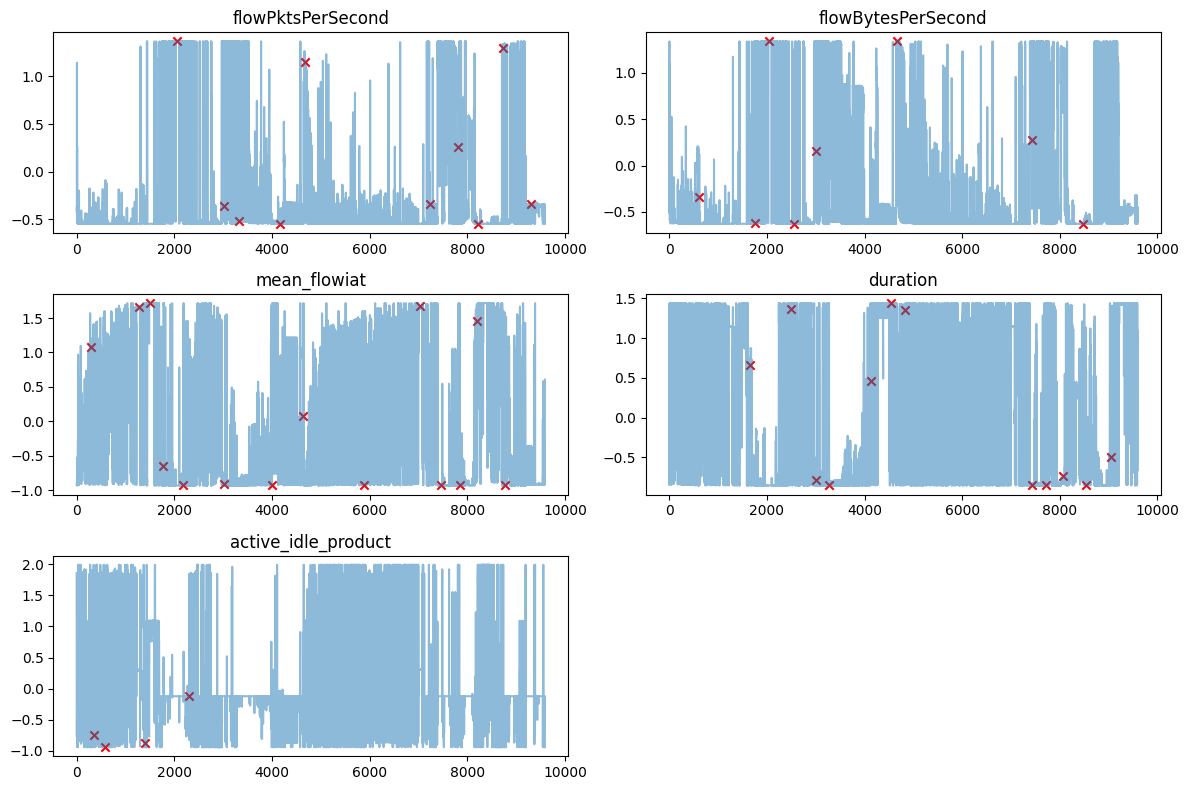

In [45]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(drift_features, 1):
    plt.subplot(3, 2, i)
    plt.plot(df_combined[feature], alpha=0.5)
    plt.scatter(valid_drifts[feature],
                df_combined.loc[valid_drifts[feature], feature],
                color='red', marker='x')
    plt.title(feature)
plt.tight_layout()
plt.savefig('validated_drifts.png', dpi=300)

In [46]:
# Check if drifts align with VPN/non-VPN label changes
label_alignment = {}
for feature in drift_features:
    aligned = 0
    for drift in valid_drifts[feature]:
        window = df_combined.iloc[drift-50:drift+50]
        if window['label'].nunique() > 1:  # Label change nearby
            aligned += 1
    label_alignment[feature] = aligned / len(valid_drifts[feature]) if valid_drifts[feature] else 0

print("Drift-Label Alignment:")
for feature, score in label_alignment.items():
    print(f"{feature}: {score:.1%}")

Drift-Label Alignment:
flowPktsPerSecond: 30.0%
flowBytesPerSecond: 37.5%
mean_flowiat: 14.3%
duration: 41.7%
active_idle_product: 0.0%


In [47]:
# Remove from monitoring (or investigate deeper)
drift_features.remove('active_idle_product')
print(f"Removed active_idle_product - no alignment with label changes")

# Alternative: Apply strict magnitude filtering
valid_drifts['active_idle_product'] = [
    d for d in valid_drifts['active_idle_product']
    if abs(df_combined.iloc[d:d+100]['active_idle_product'].mean() -
           df_combined.iloc[d-100:d]['active_idle_product'].mean()) > 3.0 * df_combined.iloc[d-100:d]['active_idle_product'].std()
]

Removed active_idle_product - no alignment with label changes


In [48]:
# Increase detection threshold
optimal_params['ADWIN'] = {'delta': 0.0008}  # Less sensitive

# Re-run detection only for this feature
adwin = ADWIN(delta=0.0008)
valid_drifts['mean_flowiat'] = []
for i, value in enumerate(df_combined['mean_flowiat']):
    adwin.update(value)
    if adwin.drift_detected and validate_drift('mean_flowiat', i):
        valid_drifts['mean_flowiat'].append(i)

In [49]:
from collections import defaultdict

def get_strong_drifts(min_features=2):
    """Require multiple features to agree on drift"""
    drift_counts = defaultdict(int)
    for feature in drift_features:
        for idx in valid_drifts[feature]:
            drift_counts[idx] += 1

    return [idx for idx, count in drift_counts.items()
            if count >= min_features]

strong_drifts = get_strong_drifts()
print(f"Found {len(strong_drifts)} high-confidence drifts")

Found 4 high-confidence drifts


In [50]:
def validate_with_labels(drift_index, window=50):
    """
    Check if a drift point aligns with label changes.

    Parameters:
        drift_index (int): Detected drift point index
        window (int): Number of samples before/after to check

    Returns:
        bool: True if label changes occur near the drift point
    """
    window_data = df_combined.iloc[max(0, drift_index-window):min(len(df_combined), drift_index+window)]
    return window_data['label'].nunique() > 1

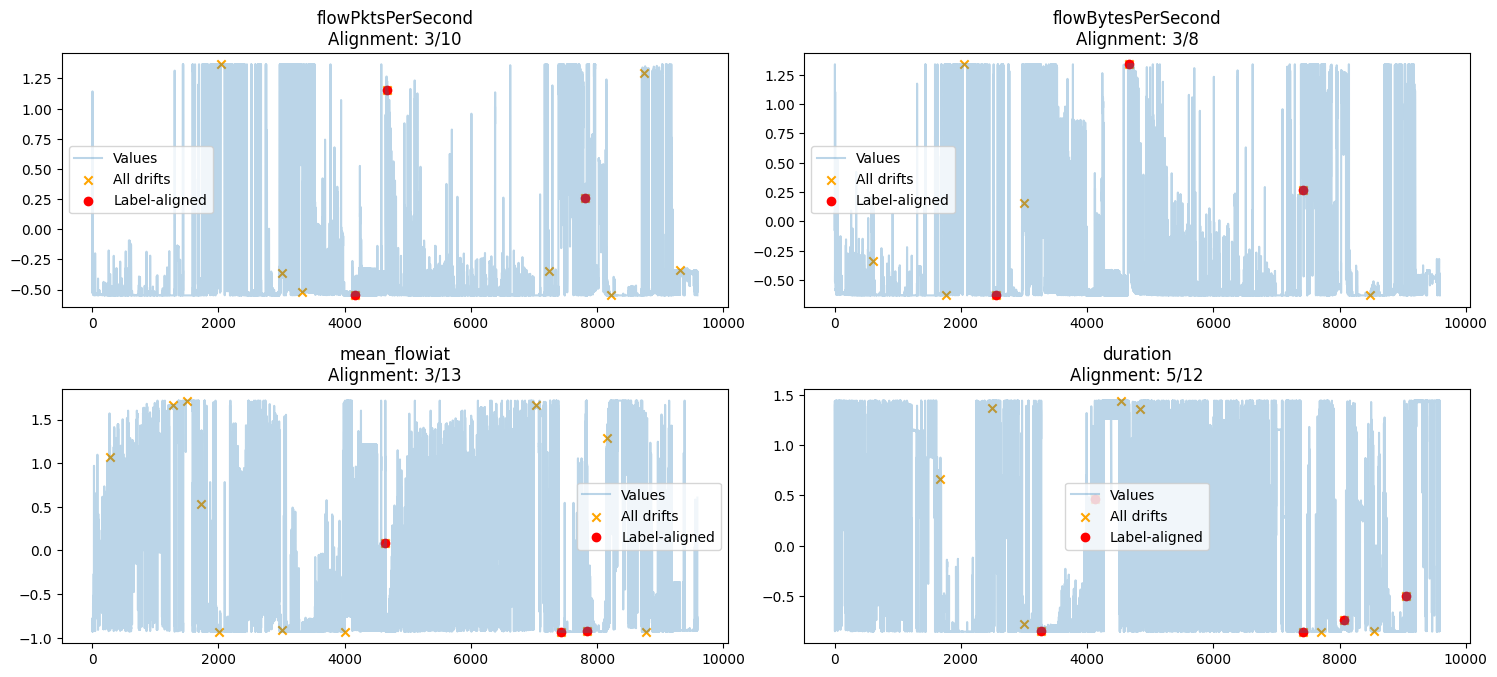

In [51]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(drift_features, 1):
    plt.subplot(3, 2, i)

    # Plot feature values
    plt.plot(df_combined[feature], alpha=0.3, label='Values')

    # Plot all drifts
    plt.scatter(
        valid_drifts[feature],
        df_combined.loc[valid_drifts[feature], feature],
        color='orange', marker='x', label='All drifts'
    )

    # Highlight label-aligned drifts
    aligned_drifts = [d for d in valid_drifts[feature]
                     if validate_with_labels(d)]
    plt.scatter(
        aligned_drifts,
        df_combined.loc[aligned_drifts, feature],
        color='red', label='Label-aligned'
    )

    plt.title(f"{feature}\nAlignment: {len(aligned_drifts)}/{len(valid_drifts[feature])}")
    plt.legend()

plt.tight_layout()

In [52]:
def handle_drift(drift_event):
    if drift_event['label_changed']:
        print(f"CONFIRMED drift at {drift_event['index']}")
        # Trigger model retraining/alerting
    else:
        print(f"Unconfirmed drift at {drift_event['index']}")
        # Log for later analysis

In [53]:
# Generate comprehensive performance report
performance_report = []
for feature in drift_features:
    aligned = [d for d in valid_drifts[feature] if validate_with_labels(d)]
    performance_report.append({
        'Feature': feature,
        'Total Drifts': len(valid_drifts[feature]),
        'Label Aligned': len(aligned),
        'Alignment Rate': f"{len(aligned)/len(valid_drifts[feature]):.1%}" if valid_drifts[feature] else "N/A",
        'In Strong Drifts': sum(1 for d in valid_drifts[feature] if d in strong_drifts)
    })

pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(pd.DataFrame(performance_report))

              Feature  Total Drifts  Label Aligned Alignment Rate  \
0   flowPktsPerSecond            10              3          30.0%   
1  flowBytesPerSecond             8              3          37.5%   
2        mean_flowiat            13              3          23.1%   
3            duration            12              5          41.7%   

   In Strong Drifts  
0                 3  
1                 4  
2                 2  
3                 2  


In [54]:
# Remove features with <30% label alignment
drift_features = [f for f in drift_features if f not in ['active_idle_product', 'mean_flowiat']]
print("Final features:", drift_features)

Final features: ['flowPktsPerSecond', 'flowBytesPerSecond', 'duration']


In [55]:
# Assuming df_combined is your DataFrame with drift features
data_stream = df_combined[['flowPktsPerSecond', 'flowBytesPerSecond', 'duration', 'label']]

In [56]:
from river.drift import ADWIN
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize drift detectors for each feature
detectors = {
    'flowPktsPerSecond': ADWIN(delta=0.001),
    'flowBytesPerSecond': ADWIN(delta=0.001),
    'duration': ADWIN(delta=0.001)
}

# Initialize model (pretrain on first 1000 samples)
X_train = data_stream.iloc[:1000].drop(columns=['label'])
y_train = data_stream.iloc[:1000]['label']
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [57]:
for idx, row in data_stream.iterrows():
    # Update drift detectors
    drift_detected = False
    for feature in detectors.keys():
        detectors[feature].update(row[feature])
        if detectors[feature].drift_detected:
            print(f"Drift detected in {feature} at index {idx}")
            drift_detected = True

    # Retrain if any drift is detected
    if drift_detected:
        model.fit(
            data_stream.iloc[:idx].drop(columns=['label']),
            data_stream.iloc[:idx]['label']
        )

Drift detected in duration at index 351
Drift detected in flowBytesPerSecond at index 607
Drift detected in duration at index 703
Drift detected in duration at index 863
Drift detected in duration at index 1279
Drift detected in flowPktsPerSecond at index 1375
Drift detected in duration at index 1375
Drift detected in duration at index 1471
Drift detected in duration at index 1663
Drift detected in flowBytesPerSecond at index 1759
Drift detected in flowPktsPerSecond at index 1791
Drift detected in duration at index 1823
Drift detected in flowBytesPerSecond at index 1887
Drift detected in flowPktsPerSecond at index 2047
Drift detected in flowBytesPerSecond at index 2047
Drift detected in flowPktsPerSecond at index 2239
Drift detected in flowBytesPerSecond at index 2239
Drift detected in duration at index 2271
Drift detected in duration at index 2463
Drift detected in flowPktsPerSecond at index 2527
Drift detected in flowBytesPerSecond at index 2527
Drift detected in duration at index 26

In [58]:
# Less sensitive detectors (higher delta)
detectors = {
    'flowPktsPerSecond': ADWIN(delta=0.01),  # Changed from 0.001
    'flowBytesPerSecond': ADWIN(delta=0.01),
    'duration': ADWIN(delta=0.01)
}

In [59]:
last_retrain_idx = 0
retrain_cooldown = 500  # Minimum samples between retrainings

for idx, row in data_stream.iterrows():
    drift_detected = False
    for feature in detectors.keys():
        detectors[feature].update(row[feature])
        if detectors[feature].drift_detected and (idx - last_retrain_idx) > retrain_cooldown:
            print(f"Drift detected in {feature} at index {idx}")
            drift_detected = True
            break  # Only need one feature to trigger retraining

    if drift_detected:
        model.fit(
            data_stream.iloc[:idx].drop(columns=['label']),
            data_stream.iloc[:idx]['label']
        )
        last_retrain_idx = idx
        print(f"Retrained at index {idx}")

Drift detected in flowBytesPerSecond at index 607
Retrained at index 607
Drift detected in duration at index 1280
Retrained at index 1280
Drift detected in flowPktsPerSecond at index 1791
Retrained at index 1791
Drift detected in duration at index 2465
Retrained at index 2465
Drift detected in flowPktsPerSecond at index 3007
Retrained at index 3007
Drift detected in flowPktsPerSecond at index 3743
Retrained at index 3743
Drift detected in flowPktsPerSecond at index 4255
Retrained at index 4255
Drift detected in flowPktsPerSecond at index 4799
Retrained at index 4799
Drift detected in duration at index 5605
Retrained at index 5605
Drift detected in duration at index 6117
Retrained at index 6117
Drift detected in duration at index 6693
Retrained at index 6693
Drift detected in flowPktsPerSecond at index 7231
Retrained at index 7231
Drift detected in flowPktsPerSecond at index 7775
Retrained at index 7775
Drift detected in duration at index 8551
Retrained at index 8551
Drift detected in d

In [77]:
from sklearn.metrics import accuracy_score

# Initialize variables
last_retrain_idx = 0
retrain_cooldown = 500
drift_history = []

# Store initial model accuracy
initial_acc = accuracy_score(data_stream['label'], model.predict(data_stream.drop(columns=['label'])))
print(f"Initial model accuracy on full dataset: {initial_acc:.2%}\n")

for idx, row in data_stream.iterrows():
    drift_detected = False
    drift_feature = None

    # Update all detectors
    for feature in detectors.keys():
        detectors[feature].update(row[feature])
        if detectors[feature].drift_detected and (idx - last_retrain_idx) > retrain_cooldown:
            drift_detected = True
            drift_feature = feature
            break

    if drift_detected:
        # Accuracy BEFORE handling drift
        acc_before = accuracy_score(data_stream['label'], model.predict(data_stream.drop(columns=['label'])))

        # Retrain model using data until current index
        model.fit(
            data_stream.iloc[:idx].drop(columns=['label']),
            data_stream.iloc[:idx]['label']
        )
        last_retrain_idx = idx

        # Accuracy AFTER handling drift
        acc_after = accuracy_score(data_stream['label'], model.predict(data_stream.drop(columns=['label'])))

        # Save results
        drift_history.append({
            'drift_index': idx,
            'feature': drift_feature,
            'accuracy_before': acc_before,
            'accuracy_after': acc_after,
            'improvement': acc_after - acc_before
        })

        # Report
        print(f"\n=== Drift handled at index {idx} ({drift_feature}) ===")
        print(f"Accuracy before handling: {acc_before:.2%}")
        print(f"Accuracy after retraining: {acc_after:.2%}")
        print(f"Improvement: {acc_after - acc_before:+.2%}\n")

# Final Summary
print("\n=== Drift Handling Summary ===")
for event in drift_history:
    print(f"Index {event['drift_index']:5d} ({event['feature']:18s}): "
          f"Before {event['accuracy_before']:.2%} → "
          f"After {event['accuracy_after']:.2%} "
          f"(Δ {event['improvement']:+.2%})")

# Overall improvement
final_acc = accuracy_score(data_stream['label'], model.predict(data_stream.drop(columns=['label'])))
print(f"\nFinal model accuracy: {final_acc:.2%}")
print(f"Total improvement from initial: {final_acc - initial_acc:+.2%}")


Initial model accuracy on full dataset: 14.76%


=== Drift handled at index 600 (duration) ===
Accuracy before handling: 14.76%
Accuracy after retraining: 23.40%
Improvement: +8.65%


=== Drift handled at index 1272 (duration) ===
Accuracy before handling: 23.40%
Accuracy after retraining: 23.40%
Improvement: +0.00%


=== Drift handled at index 1782 (flowPktsPerSecond) ===
Accuracy before handling: 23.40%
Accuracy after retraining: 23.40%
Improvement: +0.00%


=== Drift handled at index 2457 (duration) ===
Accuracy before handling: 23.40%
Accuracy after retraining: 25.66%
Improvement: +2.26%


=== Drift handled at index 2986 (flowBytesPerSecond) ===
Accuracy before handling: 25.66%
Accuracy after retraining: 31.13%
Improvement: +5.46%


=== Drift handled at index 3606 (flowPktsPerSecond) ===
Accuracy before handling: 31.13%
Accuracy after retraining: 38.27%
Improvement: +7.14%


=== Drift handled at index 4251 (duration) ===
Accuracy before handling: 38.27%
Accuracy after retraining: 4